In [1]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:00<00:00, 111MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 55.6MB/s]


In [19]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img,ImageDataGenerator

In [3]:
train_file = "/content/sign_mnist_test.csv"
test_file = "/content/sign_mnist_test.csv"

In [14]:
with open(train_file, "r") as f:
  line = f.readline()
  print("Header looks like: ", line)
  print("Size: ", len(line.split(",")))
  line = f.readline()
  print("Data looks like", line)
  print("Size: ", len(line.split(",")))

Header looks like:  label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pi

In [22]:
def parse_data(filename):
  with open(filename, "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    labels = []
    images = []
    next(csv_reader)
    for row in csv_reader:
      labels.append(row[0])
      images.append(np.array(row[1:]).reshape((28, 28)))

    images = np.array(images).astype(float)
    labels = np.array(labels).astype(float)

  return labels, images

In [23]:
train_labels, train_images = parse_data(train_file)
test_labels, test_images = parse_data(test_file)

print(f"Training images has shape: {train_images.shape} and dtype: {train_images.dtype}")
print(f"Training labels has shape: {train_labels.shape} and dtype: {train_labels.dtype}")
print(f"Validation images has shape: {test_images.shape} and dtype: {test_images.dtype}")
print(f"Validation labels has shape: {test_labels.shape} and dtype: {test_labels.dtype}")

Training images has shape: (7172, 28, 28) and dtype: float64
Training labels has shape: (7172,) and dtype: float64
Validation images has shape: (7172, 28, 28) and dtype: float64
Validation labels has shape: (7172,) and dtype: float64


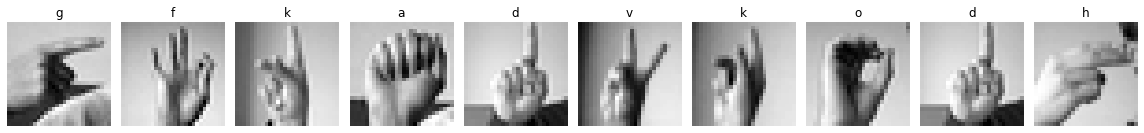

In [24]:
def plot_cats(images, labels):
  import string
  fig, axes = plt.subplots(1, 10, figsize=(16,15))
  axes = axes.flatten()
  letters = list(string.ascii_lowercase)

  for k in range(10):
    im = images[k]
    im = np.expand_dims(im, axis=-1)
    im = array_to_img(im)
    ax = axes[k]
    ax.imshow(im, cmap="gray")
    ax.set_title(letters[int(labels[k])])
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_cats(train_images, train_labels)

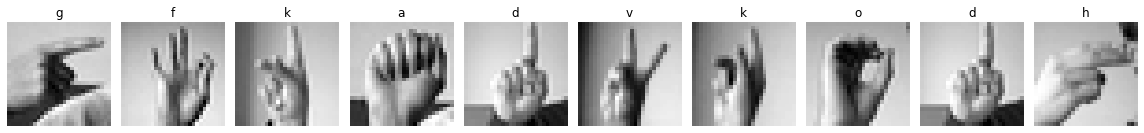

In [25]:
plot_cats(test_images, test_labels)

In [34]:
def train_val_generators(train_imgs, train_labels, test_imgs, test_labels):

  train_imgs = np.expand_dims(train_imgs, axis=-1)
  test_imgs = np.expand_dims(test_imgs, axis=-1)

  train_gen = ImageDataGenerator(rescale=1/255.)
  test_gen = ImageDataGenerator(rescale=1/255.)

  train_generator = train_gen.flow(x=train_imgs,
                                   y=train_labels,
                                   batch_size=32)
  
  test_generator = test_gen.flow(x=test_imgs,
                                 y=test_labels,
                                 batch_size=32)

  return train_generator, test_generator

In [35]:
train_generator, test_generator = train_val_generators(train_images, train_labels, test_images, test_labels)

In [37]:
print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {test_generator.x.shape}")
print(f"Labels of validation generator have shape: {test_generator.y.shape}")

Images of training generator have shape: (7172, 28, 28, 1)
Labels of training generator have shape: (7172,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


In [40]:
def create_model():
  model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')])
  
  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
  return model

model = create_model()

In [42]:
hist = model.fit(train_generator, validation_data=test_generator, epochs=5)

Epoch 1/5
225/225 [==============================] - 19s 82ms/step - loss: 1.7900 - accuracy: 0.4944 - val_loss: 0.3464 - val_accuracy: 0.9324
Epoch 2/5
225/225 [==============================] - 15s 67ms/step - loss: 0.1593 - accuracy: 0.9697 - val_loss: 0.0364 - val_accuracy: 0.9989
Epoch 3/5
225/225 [==============================] - 11s 51ms/step - loss: 0.0165 - accuracy: 0.9997 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 4/5
225/225 [==============================] - 12s 54ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/5
225/225 [==============================] - 9s 41ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000


<Figure size 432x288 with 0 Axes>

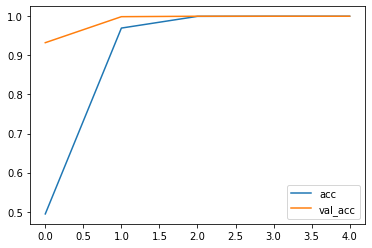

<Figure size 432x288 with 0 Axes>

In [49]:
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]

eps = range(len(acc))

plt.plot(eps, acc, label="acc")
plt.plot(eps, val_acc, label="val_acc")
plt.legend()
plt.figure()

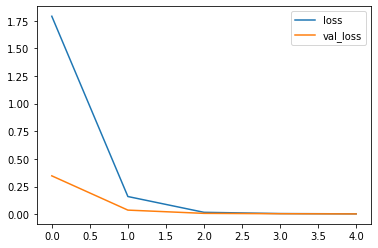

In [50]:
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()